In [1]:
from datetime import date
from nsepy import get_history
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline

In [2]:
# hdfc_bank = get_history(symbol='HDFCBANK',
#                    start=date(2000,1,1),
#                    end=date(2019,8,27))
# hdfc_bank.to_csv("hdfc_bank_daily_price_movement.csv")

hdfc_bank = pd.read_csv(filepath_or_buffer="HDFCBANK.NS.csv", 
                        index_col='Date',
                        parse_dates=True
                       )
hdfc_bank.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-22,2220.850098,2220.850098,2167.050049,2174.100098,2174.100098,3498011.0
2019-08-23,2161.000000,2177.000000,2139.600098,2162.699951,2162.699951,5024904.0
2019-08-26,2194.899902,2266.149902,2167.000000,2256.149902,2256.149902,6320061.0
2019-08-27,2256.000000,2272.899902,2240.100098,2259.949951,2259.949951,5165208.0
2019-08-28,2250.000000,2257.350098,2226.350098,2247.500000,2247.500000,3415647.0


In [3]:
hdfc_bank.index

DatetimeIndex(['2000-08-29', '2000-08-30', '2000-08-31', '2000-09-01',
               '2000-09-04', '2000-09-05', '2000-09-06', '2000-09-07',
               '2000-09-08', '2000-09-11',
               ...
               '2019-08-14', '2019-08-16', '2019-08-19', '2019-08-20',
               '2019-08-21', '2019-08-22', '2019-08-23', '2019-08-26',
               '2019-08-27', '2019-08-28'],
              dtype='datetime64[ns]', name='Date', length=4755, freq=None)

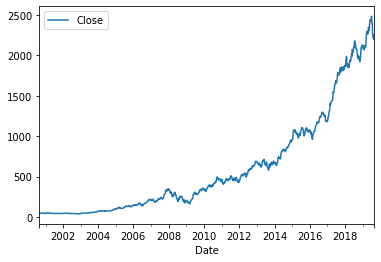

In [16]:
wkly = hdfc_bank.resample('W').mean()
wkly.plot(y='Close')

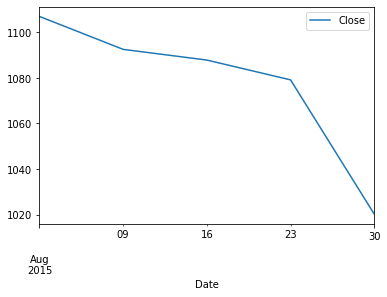

In [15]:
wkly['2015-08'].plot(y='Close')

## Additive Decomposition

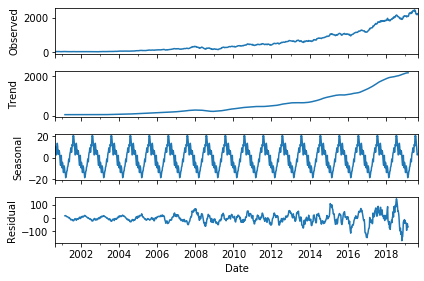

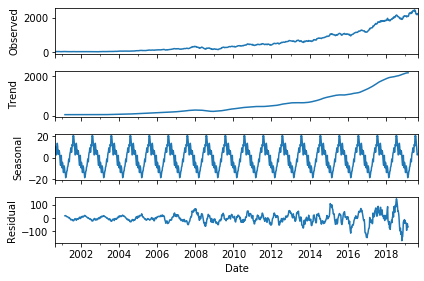

In [17]:
dcmp = seasonal_decompose(wkly.Close )
dcmp.plot()

## Identifying Trends in Time Series
    - Rolling Method and ADCF

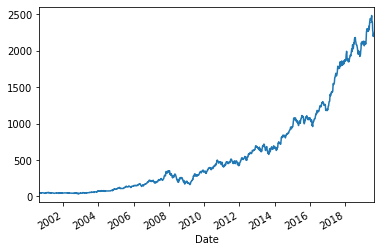

In [22]:
hdfc_bank.Close.rolling(5).mean().plot()

## Augmented Dickey-Fuller test

In [13]:
result = adfuller(wkly.Close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.499804
p-value: 1.000000
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568


## Making Time Series Stationary

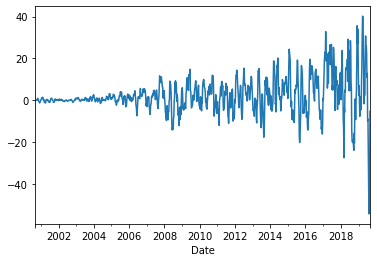

In [24]:
diff = wkly['Close'] - wkly['Close'].shift(1)
diff = diff.dropna() #.plot()
diff = pd.DataFrame(diff)
diff.Close.rolling(5).mean().plot()

In [25]:
result = adfuller(diff.Close)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
# for key, value in result[4].items():
# 	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.720937
p-value: 0.000000
Critical Values:


In [26]:
model = ARIMA(diff.Close, order=(0,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                  991
Model:                     ARMA(0, 1)   Log Likelihood               -4228.948
Method:                       css-mle   S.D. of innovations             17.260
Date:                Fri, 18 Oct 2019   AIC                           8463.895
Time:                        08:48:36   BIC                           8478.591
Sample:                    09-10-2000   HQIC                          8469.483
                         - 09-01-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.2328      0.602      3.711      0.000       1.053       3.412
ma.L1.Close     0.0976      0.030      3.236      0.001       0.038       0.157
                                    Roots       

In [28]:
model.predict(wkly.Close)

array([47.33333333, 46.35972488, 46.34447445, 46.31134494, 46.38868936,
       46.41782351, 46.36431331, 46.37277958, 46.3745632 , 46.39596232,
       46.35593815, 46.32174064, 46.31665675, 46.35821745, 46.35080314,
       46.40588306, 46.32503645, 46.37531897, 46.39172393, 46.39218468,
       46.44292992, 46.36161069, 46.3717308 , 46.41074319, 46.3621359 ,
       46.32957704, 46.39202093, 46.36631101, 46.28571026, 46.34539207,
       46.34886021, 46.3555128 , 46.37848903, 46.42312416, 46.34761465,
       46.34705182, 46.37786263, 46.3709123 , 46.36121486, 46.35199175,
       46.3666557 , 46.33135953, 46.31541354, 46.37550919, 46.33705527,
       46.38848691, 46.41681636, 46.38452991, 46.38966556, 46.35848836,
       46.37469436, 46.37303232, 46.36649847, 46.36009745, 46.31819239,
       46.30968263, 46.38059155, 46.36727919, 46.39948189, 46.3913556 ,
       46.35757728, 46.3466043 , 46.36801919, 46.37120095, 46.38135229,
       46.37241392, 46.37024393, 46.37086261, 46.34297002, 46.36